In [1]:
%matplotlib inline

In [2]:
import pythonRunner
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
# Constants
BETAS = [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5]
ALPHAS = [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5]
A_AND_B = [(a, b) for a in ALPHAS for b in BETAS]
N = 100
T_FACTOR = 1000
MEASURE_STEP = 10
RUN_COUNT = 64
THREAD_COUNT = 4
MUTATION_SCALE = range(0, T_FACTOR * N + 1, MEASURE_STEP)

In [5]:
measures = [pythonRunner.pythonRunner(beta, alpha, N, T_FACTOR, MEASURE_STEP, RUN_COUNT, THREAD_COUNT) for alpha, beta in A_AND_B]

# FIXED BETAS

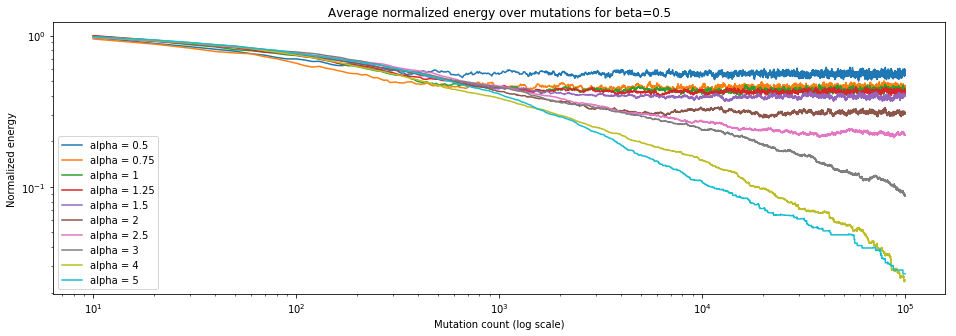

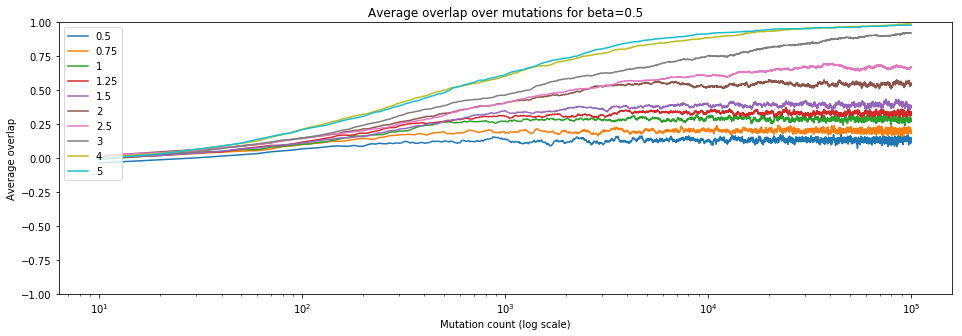

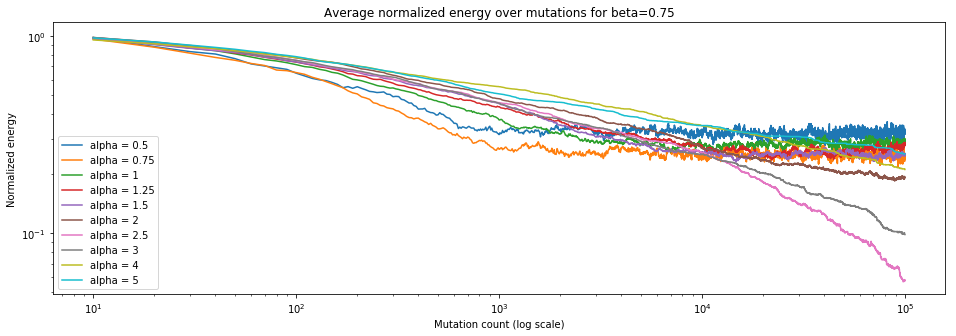

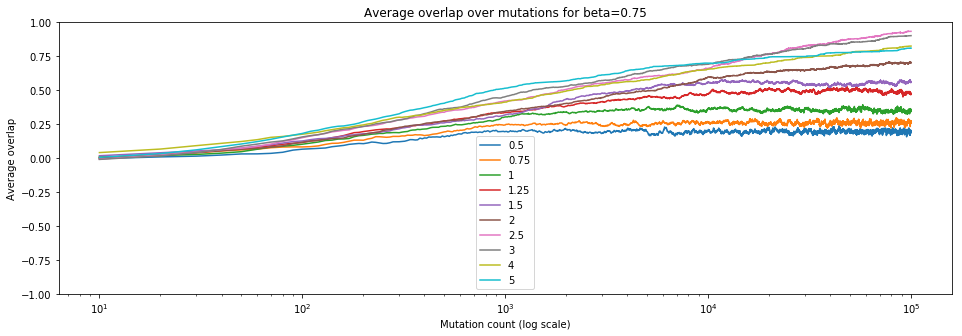

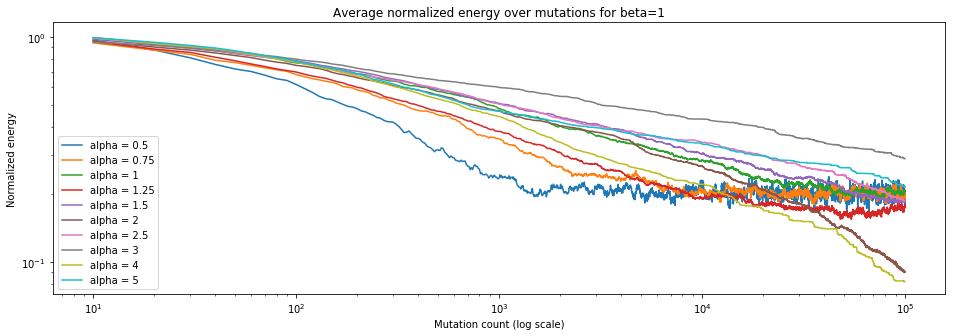

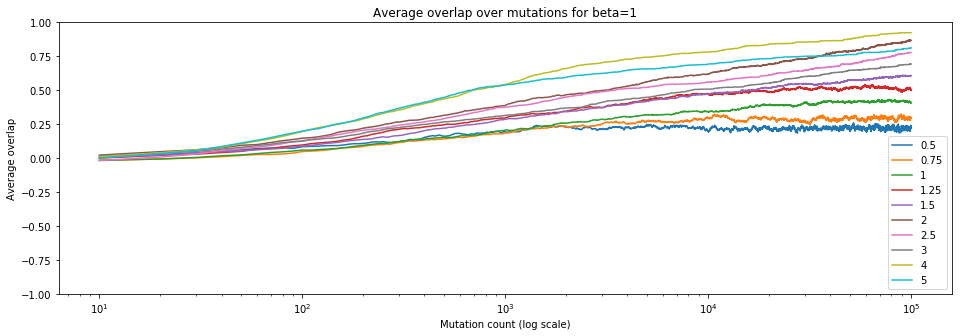

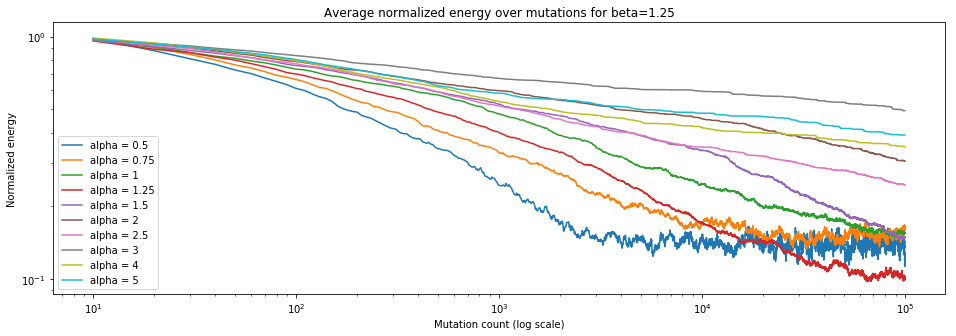

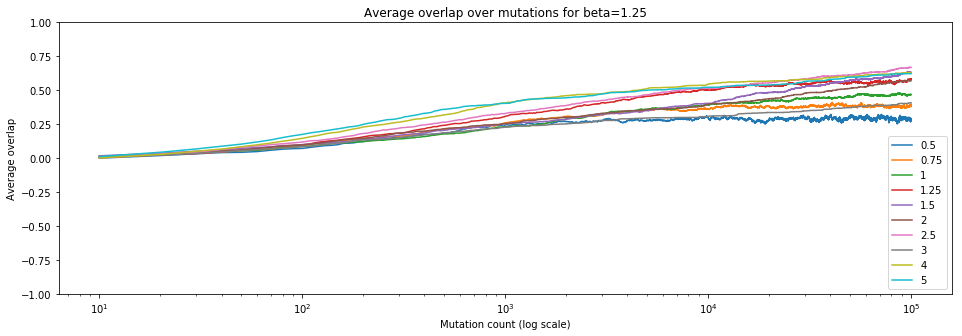

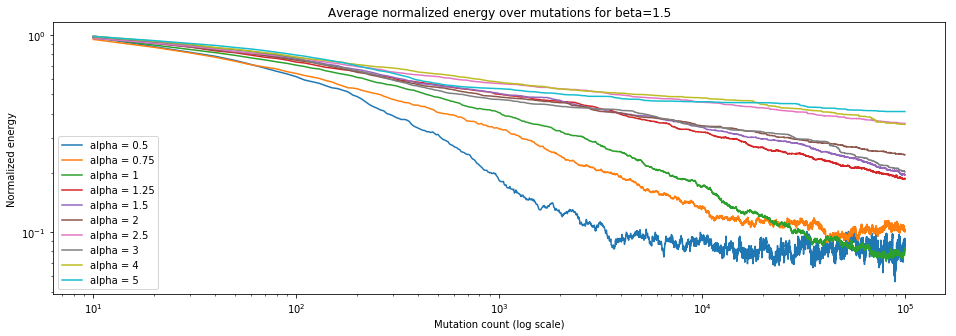

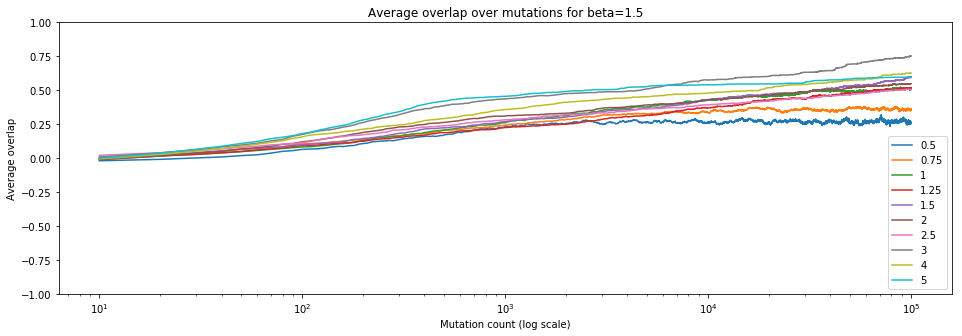

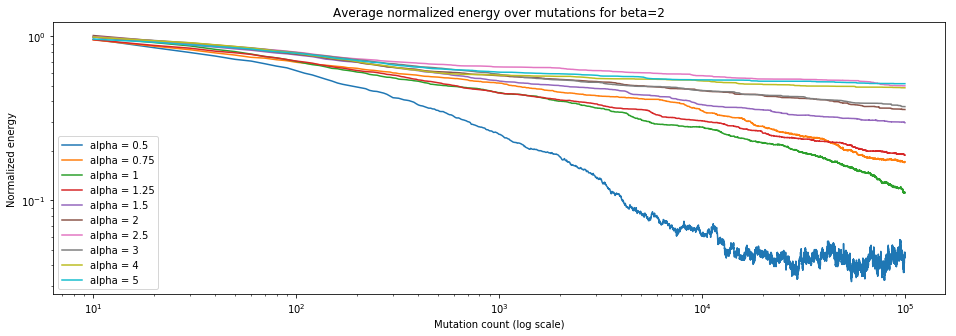

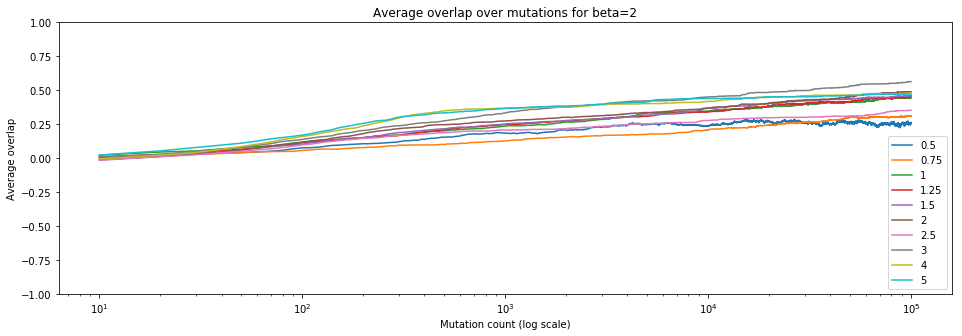

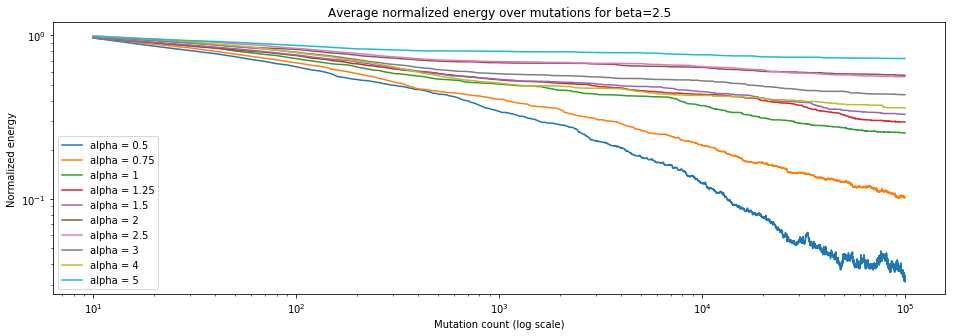

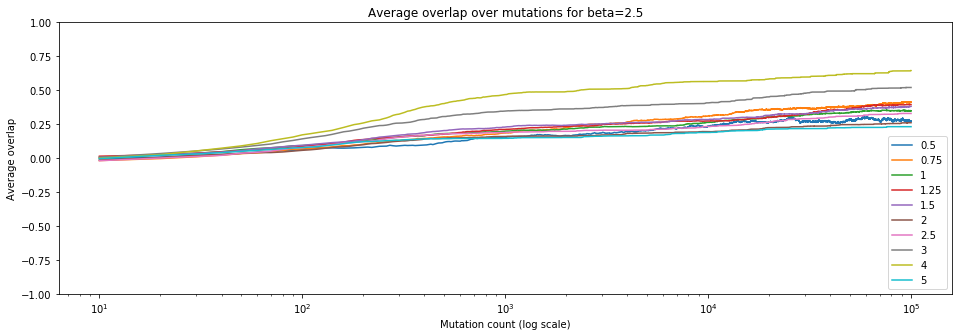

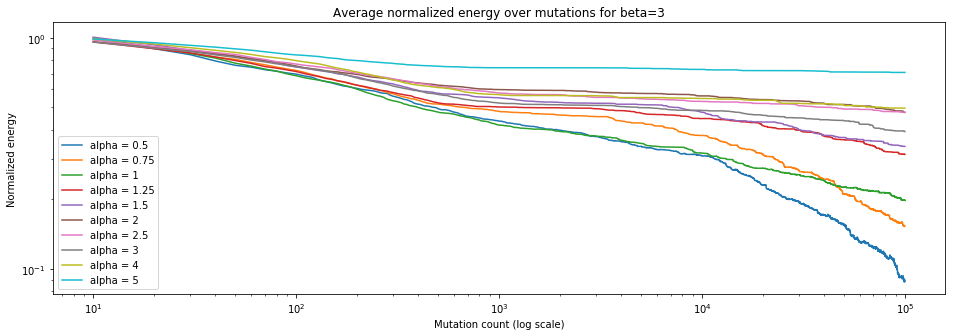

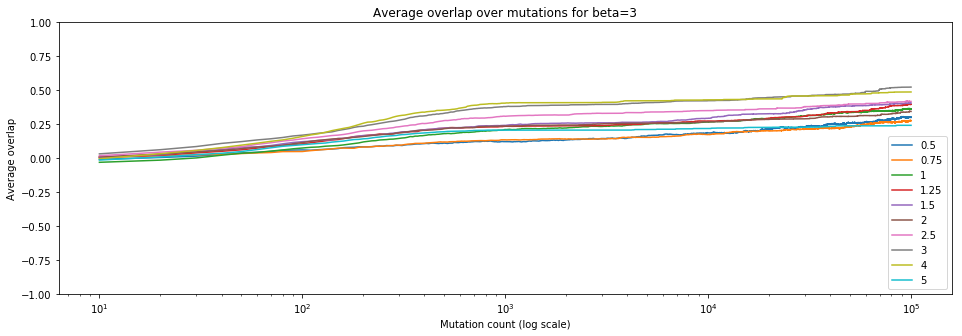

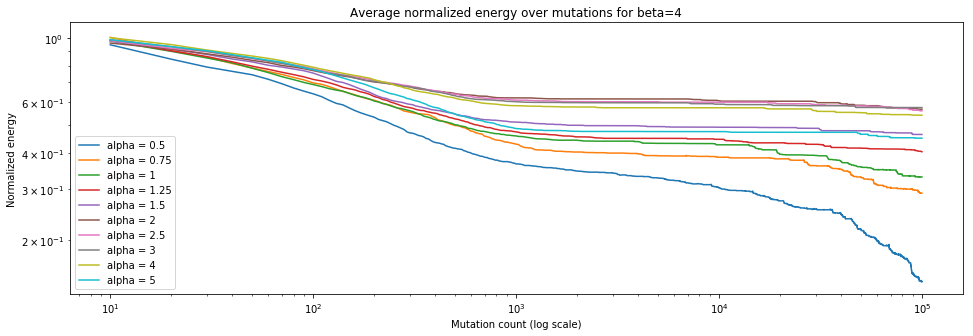

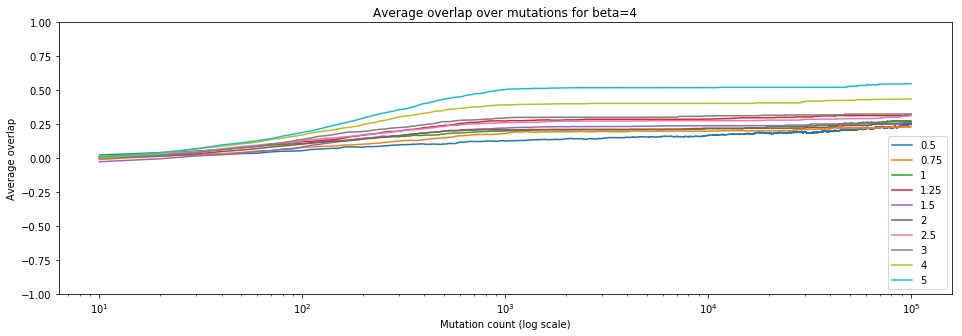

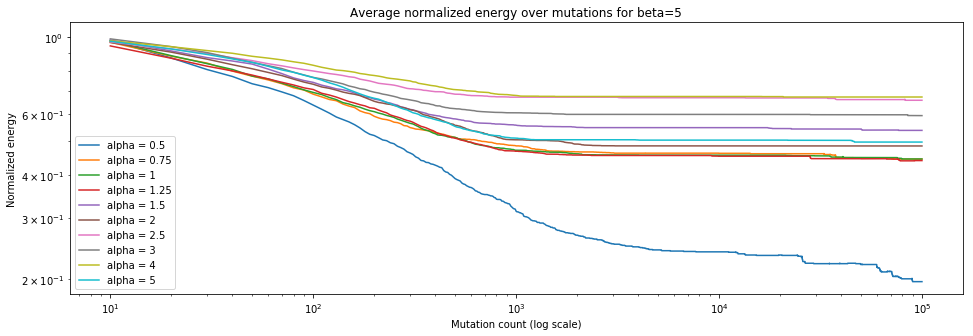

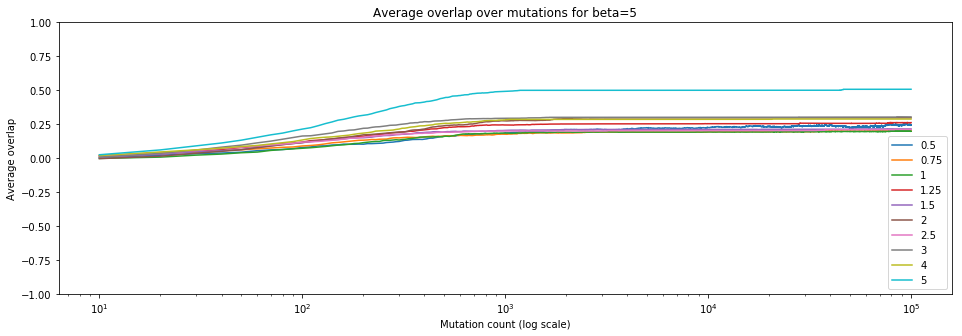

In [6]:
# Plot
for betaOffset in range(len(BETAS)):
    for i in range(len(ALPHAS)):
        index = i * len(BETAS) + betaOffset
        eMeasuresForAlpha, tmp = measures[index]
        averageEMeasuresForAlpha = np.mean(eMeasuresForAlpha, axis=1)
        plt.plot(MUTATION_SCALE, averageEMeasuresForAlpha / int(ALPHAS[i] * N), label='alpha = ' + str(ALPHAS[i]))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='best')
    plt.title('Average normalized energy over mutations for beta=' + str(BETAS[betaOffset]))
    plt.xlabel('Mutation count (log scale)')
    plt.ylabel('Normalized energy')
    plt.show()
    
    
    for i in range(len(ALPHAS)):
        index = i * len(BETAS) + betaOffset
        tmp, overlapMeasuresForAlpha = measures[index]
        overlapMeasuresForAlpha = np.mean(overlapMeasuresForAlpha, axis=1)
        plt.plot(MUTATION_SCALE, overlapMeasuresForAlpha, label=str(ALPHAS[i]))
    plt.xscale('log')
    plt.ylim(ymin=-1, ymax=1)
    plt.legend(loc='best')
    plt.title('Average overlap over mutations for beta=' + str(BETAS[betaOffset]))
    plt.xlabel('Mutation count (log scale)')
    plt.ylabel('Average overlap')
    plt.show()